## Initialization

In [1]:
import sys  

sys.path.insert(1, "./../../../../ESN-IP/SOURCES/.")

In [2]:
from Reservoir import Reservoir

In [3]:
vanilla_reservoir = Reservoir(N=10)

In [4]:
vanilla_reservoir.rescale_weights(0.95)

## Testing Intrinsic Metrics 

In [5]:
from Metrics import MC, MLLE, DeltaPhi, Neff

In [6]:
MLLE().evaluate(vanilla_reservoir)

-0.3723565

In [7]:
MC().evaluate(vanilla_reservoir)

tensor(6.0876)

In [8]:
DeltaPhi().evaluate(vanilla_reservoir)

0.10727947137587257

In [9]:
Neff(transient=100).evaluate(vanilla_reservoir)

2.022081084311137

## Testing Estrinsic Metrics

In [10]:
from DATA import MG17
from Metrics import MSE, NRMSE, MAE, ME
from ESN import EchoStateNetwork

In [11]:
data = MG17(split = True, percentages=[80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [12]:
esn = EchoStateNetwork(vanilla_reservoir)

In [13]:
esn.train(X_TR, Y_TR)

Reservoir warmed up with the first 100 time steps


array([0.08267538, 0.00441471, 0.07275722, ..., 0.03665707, 0.04820982,
       0.05255071], dtype=float32)

In [14]:
y_pred = esn.predict(X_TS)

tensor(1.1149e-06, dtype=torch.float64)

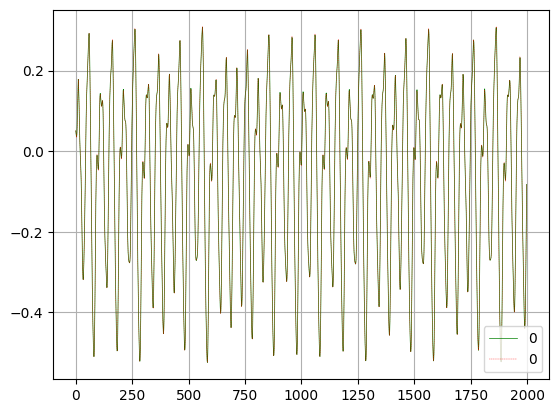

In [15]:
MSE(plot=True).evaluate(y_pred, Y_TS)

In [16]:
NRMSE(plot=False).evaluate(y_pred, Y_TS)

0.21797744278976947

In [17]:
MAE().evaluate(y_pred, Y_TS)

tensor(0.0008, dtype=torch.float64)

In [18]:
ME().evaluate(y_pred, Y_TS)

tensor(-6.2465e-06, dtype=torch.float64)